In [5]:
# In this example, we will explain what is an outlier, and why outlier detection helps the validity of data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

cali_houses = fetch_california_housing()

X = cali_houses.data
column_names = cali_houses.feature_names
y = cali_houses.target

df = pd.DataFrame(data=X, columns=column_names)
display(df)

dfy = pd.DataFrame(data=y, columns=cali_houses.target_names)
display(dfy)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


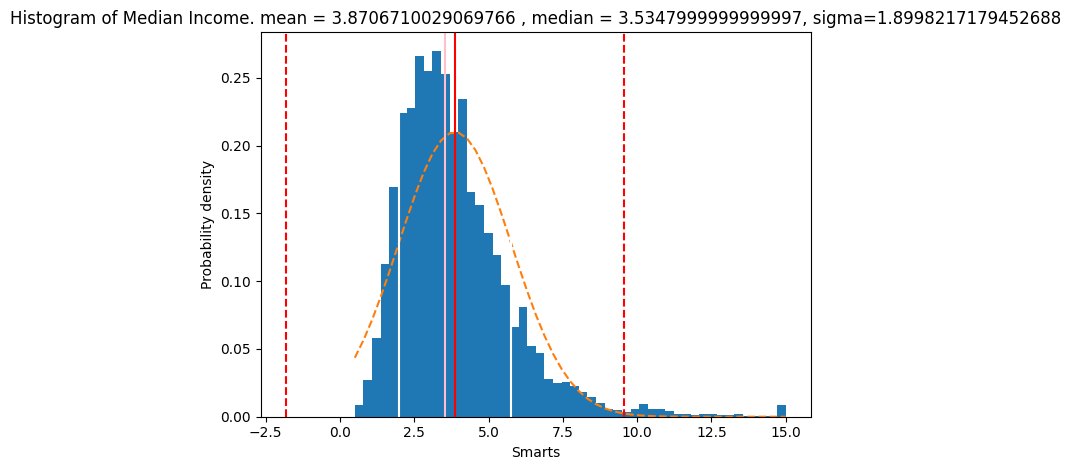

In [6]:
# Outlier detection depends on distances and/or densities and distance calculations can be really skewed on non-normalized data.
x = df.MedInc
sigma = x.std()
mu = x.mean()
median = x.median()

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(f'Histogram of Median Income. mean = {mu} , median = {median}, sigma={sigma}')
ax.axvline(x=median , color = 'pink')
ax.axvline(x=mu , color = 'red')
ax.axvline(x=mu+sigma , color = 'white')
ax.axvline(x=mu-sigma , color = 'white')
ax.axvline(x=mu+sigma*3, color = 'red',linestyle = '--')
ax.axvline(x=mu-sigma*3, color = 'red', linestyle = '--')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

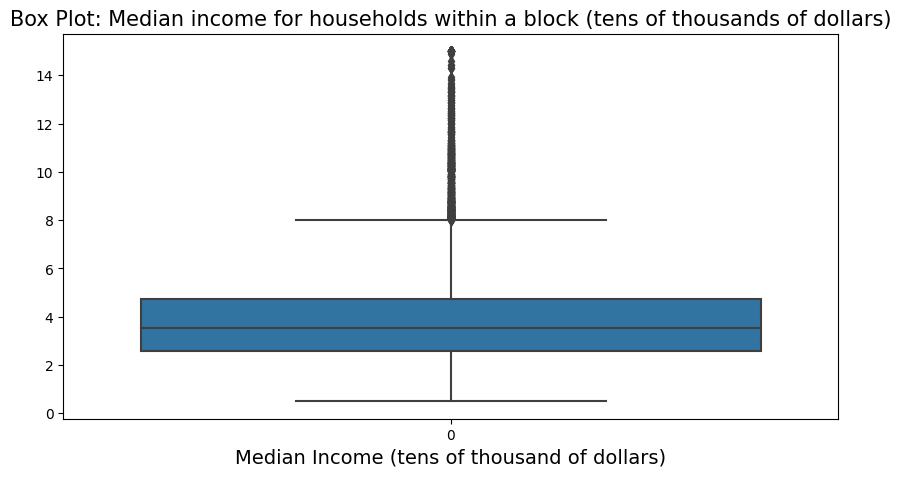

In [7]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df.MedInc)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()
